In [1]:
import json as json
import matplotlib.pyplot as plt
import os
import numpy as np

import multifil
import treatment_definitions as td
import graphing_utilities as gutil

# List valid things that can be changed
print("valid constant (phenotype) parameters\n", multifil.hs.hs.VALID_PARAMS)

imported SRX-enabled multifil
valid constant (phenotype) parameters
 ['mf_k', 'mh_c_ks', 'mh_c_kw', 'mh_c_rs', 'mh_c_rw', 'mh_g_ks', 'mh_g_kw', 'mh_g_rs', 'mh_g_rw', 'detachment_rate', 'mh_fd_k0', 'mh_fd_delta', 'mh_attachment_rate', 'mh_ps_rate', 'af_k', 'ti_a', 'ti_b']


In [2]:
print(os.cpu_count())

4


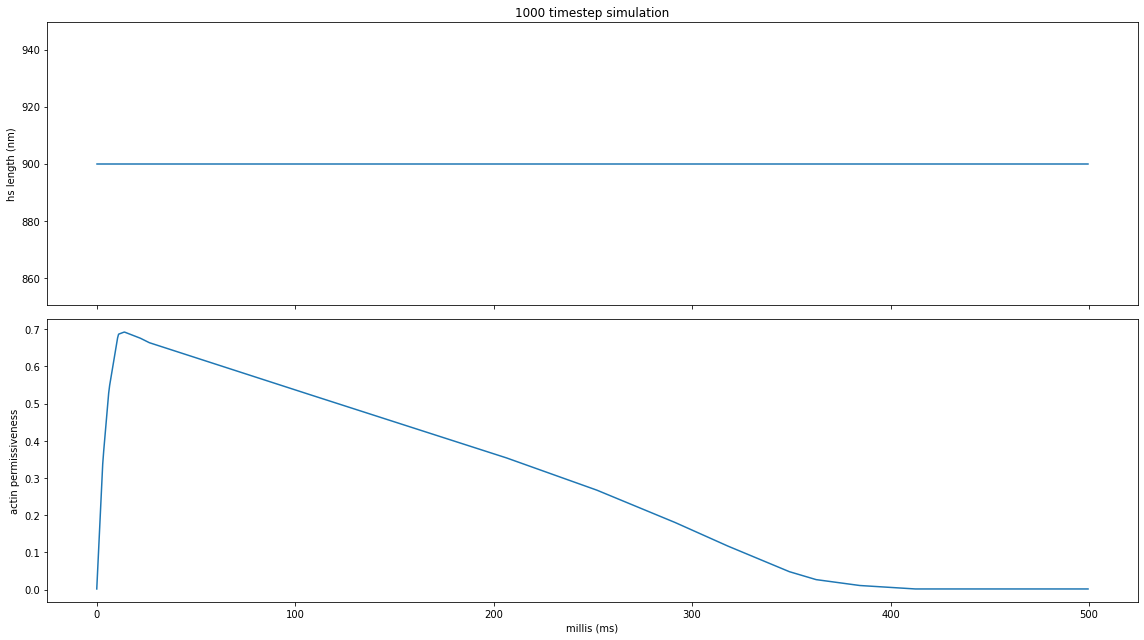

In [3]:
# Setup experiment, show the traces
time_trace, length_trace, ap_trace, _ = td.davis_t_spring()  # We only want the three traces, so we discard the last bit
mh_c_rs_wt, mh_g_rs_wt = td.stepsize_to_tht_mag(step_size=7.8)
# print(mh_c_rs_wt, mh_g_rs_wt)
wildtype = False
if wildtype:
    # specify we want the force-sensitive detatchment rate
    comment = "WT"
    params = {'detachment_rate':'force_sensitive', 'mh_fd_k0':0.102, 'mh_fd_delta':1.3, 'mh_c_rs':mh_c_rs_wt, 'mh_g_rs':mh_g_rs_wt} # Wildtype
else:
    # Create mh isomer profile - P710R mechanics
    mh_c_rs_mut, mh_g_rs_mut = td.stepsize_to_tht_mag(step_size=3.0)
    # print(mh_c_rs_mut, mh_g_rs_mut)
    comment = 'P710R_a100k' #"OM_fixed" 'P710R_dr'
    params = {'mh_iso':[{'iso_p':0, 'detachment_rate':'force_sensitive', 'mh_fd_k0':0.102, 'mh_fd_delta':1.3, 'mh_c_rs':mh_c_rs_wt, 'mh_g_rs':mh_g_rs_wt},  # Wildtype
                        {'iso_p':1, 'detachment_rate':'force_sensitive', 'mh_fd_k0':0.087, 'mh_fd_delta':0.31, 'mh_attachment_rate':110, 'mh_ps_rate':0.06, 'mh_c_kw':20, 'mh_c_ks':20}]
                         #P710R_a'mh_fd_k0':0.087, 'mh_fd_delta':0.31, 'mh_attachment_rate':110, 'mh_ps_rate': 0.6}#mistake on ps_rate, set to 0.06 for dr, a100 and a50 'mh_c_rs':mh_c_rs_mut, 'mh_g_rs':mh_g_rs_mut,
                         #D239N 'mh_fd_k0':0.140, 'mh_fd_delta':1.4, 'mh_attachment_rate':72, 'mh_ps_rate': 0.15},#    # P710R, k0 originally 80
                         #P710R 'mh_fd_k0':0.087, 'mh_fd_delta':0.31, 'mh_attachment_rate':1.5, 'mh_ps_rate': 45, 'mh_attachment_rate':120, 'mh_ps_rate': 0.06
                          #alpha 'mh_fd_k0':0.204, 'mh_fd_delta':2.0, 'mh_attachment_rate':252
             }

#plot the traces
gutil.plot_input_traces(time_trace, length_trace, ap_trace)

#print the phenotype settings

In [4]:
"""This code runs a single simulation"""
output_dir = "../_output/force_sensitive/October/"
os.makedirs(output_dir, exist_ok=True)

# check the comment to see what we are passing to it.
wl_meta = multifil.aws.metas.emit(
    path_local=output_dir,  # local dir to save run output to
    path_s3=None,  #s3 bucket to upload results to
    time=time_trace,
    poisson=0.0,  # poisson ratio, set to const lattice here
    ls=None,  # intial ls, using default by passing none
    z_line=length_trace, 
    actin_permissiveness=ap_trace,
    comment=comment,  # comment describing run
    hs_params=params,  # constants we want to alter - phenotype
    write=True,  # whether to write out resulting file or just pass back to variable
)

# determine where the metafile was saved.
run_name = wl_meta['name']
print(run_name)
run_file = output_dir + run_name + ".meta.json"

print(wl_meta['hs_params'])

run_manager = multifil.aws.run.manage(run_file, unattended=False) # have run.py create the sarc from meta
# Begin running
data, exit_code = run_manager.run_and_save()   # with our new sarc, run it, getting the data from it.

1be4ffd8-0a71-11eb-9a1a-c49deda59ed1
{'mh_iso': [{'iso_p': 0, 'detachment_rate': 'force_sensitive', 'mh_fd_k0': 0.102, 'mh_fd_delta': 1.3, 'mh_c_rs': 1.2210175489832857, 'mh_g_rs': 16.783305678313738}, {'iso_p': 1, 'detachment_rate': 'force_sensitive', 'mh_fd_k0': 0.087, 'mh_fd_delta': 0.31, 'mh_attachment_rate': 110, 'mh_ps_rate': 0.06, 'mh_c_kw': 20, 'mh_c_ks': 20}]}

MainProcess finished timestep 1 of 1000, 0h2m17s left

C:\Users\aliso\Documents\GitHub\multifil\multifil\ti.py:184: UserWarning: Check radial force direction in titin
  warnings.warn("Check radial force direction in titin")



MainProcess finished timestep 101 of 1000, 0h9m31s left
MainProcess finished timestep 201 of 1000, 0h8m18s left
MainProcess finished timestep 301 of 1000, 0h7m12s left
MainProcess finished timestep 401 of 1000, 0h6m11s left
MainProcess finished timestep 501 of 1000, 0h5m3s left
MainProcess finished timestep 601 of 1000, 0h3m59s left
MainProcess finished timestep 701 of 1000, 0h2m54s left
MainProcess finished timestep 801 of 1000, 0h1m50s left
MainProcess finished timestep 901 of 1000, 0h0m51s leftrun.py MainProcess # ## model finished, uploading
run.py MainProcess # ## uploading finished, done with this run


saved to: ../_output/force_sensitive/October/\1be4ffd8-0a71-11eb-9a1a-c49deda59ed1.png


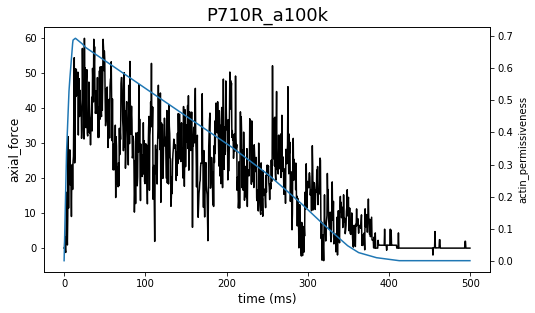

In [5]:
# graph the result
gutil.plot_data(data, title=comment, save_dir=output_dir)

In [6]:
gutil.print_constants(data['constants'])

ti
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
 	ti_a = 240 ti_b = 0.0045 
af
 	af_k = 1743 
 	af_k = 1743 
 	af_k = 1743 
 	af_k = 1743 
 	af_k = 1743 
 	af_k = 1743 
 	af_k = 1743 
 	af_k = 1743 
mf
 	mf_k = 2020 
 	mf_k = 2020 
 	mf_k = 2020 
 	mf_k = 2020 
mh


 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.087 mh_fd_delta = 0.31 mh_attachment_rate = 110 mh_ps_rate = 0.06 mh_open_rate = 0.5 , 	 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.087 mh_fd_delta = 0.31 mh_attachment_rate = 110 mh_ps_rate = 0.06 mh_open_rate = 0.5 , 	 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.087 mh_fd_delta = 0.31 mh_attachment_rate = 110 mh_ps_rate = 0.06 mh_open_rate = 0.5 , 	 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sen

= 0.31 mh_attachment_rate = 110 mh_ps_rate = 0.06 mh_open_rate = 0.5 , 	 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.087 mh_fd_delta = 0.31 mh_attachment_rate = 110 mh_ps_rate = 0.06 mh_open_rate = 0.5 , 	 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.087 mh_fd_delta = 0.31 mh_attachment_rate = 110 mh_ps_rate = 0.06 mh_open_rate = 0.5 , 	 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.087 mh_fd_delta = 0.31 mh_attachment_rate = 110 mh_ps_rate = 0.06 mh_open_rate = 0.5 , 	 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2

 , 	 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.087 mh_fd_delta = 0.31 mh_attachment_rate = 110 mh_ps_rate = 0.06 mh_open_rate = 0.5 , 	 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.087 mh_fd_delta = 0.31 mh_attachment_rate = 110 mh_ps_rate = 0.06 mh_open_rate = 0.5 , 	 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.087 mh_fd_delta = 0.31 mh_attachment_rate = 110 mh_ps_rate = 0.06 mh_open_rate = 0.5 , 	 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force

20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.087 mh_fd_delta = 0.31 mh_attachment_rate = 110 mh_ps_rate = 0.06 mh_open_rate = 0.5 , 	 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.087 mh_fd_delta = 0.31 mh_attachment_rate = 110 mh_ps_rate = 0.06 mh_open_rate = 0.5 , 	 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.087 mh_fd_delta = 0.31 mh_attachment_rate = 110 mh_ps_rate = 0.06 mh_open_rate = 0.5 , 	 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.087 m

 = 110 mh_ps_rate = 0.06 mh_open_rate = 0.5 , 	 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.087 mh_fd_delta = 0.31 mh_attachment_rate = 110 mh_ps_rate = 0.06 mh_open_rate = 0.5 , 	 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.087 mh_fd_delta = 0.31 mh_attachment_rate = 110 mh_ps_rate = 0.06 mh_open_rate = 0.5 , 	 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19.93 mh_g_rs = 16.47 detachment_rate = force_sensitive mh_fd_k0 = 0.087 mh_fd_delta = 0.31 mh_attachment_rate = 110 mh_ps_rate = 0.06 mh_open_rate = 0.5 , 	 	mh_c_ks = 20 mh_c_kw = 20 mh_c_rw = 0.8230972752405258 mh_c_rs = 1.2775810124598492 mh_g_ks = 2 mh_g_kw = 2 mh_g_rw = 19